# 410921217鄭宇婕 410921206 石心柔

# Load the dataset 取得需要的dataset

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
rating_header = ["user_id", "item_id", "rating", "timestamp"]
rating = pd.read_csv("C:\\Users\\Sophia\\Desktop\\RecommendSystem_final\\ml-100k\\ml-100k\\u.data", sep = '\t', header = None, names=rating_header)
rating.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [28]:
# load the user data into a dataframe
user_header = ["user_id", "age", "gender", "occupation", "zip_code"]
users = pd.read_csv("C:\\Users\\Sophia\\Desktop\\RecommendSystem_final\\ml-100k\\ml-100k\\u.user", sep = '|', header = None, names=user_header)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [29]:
users.loc[users['zip_code'] == 'T8H1N']

,user_id,age,gender,occupation,zip_code
73,74,39,M,scientist,T8H1N
633,634,39,M,engineer,T8H1N


In [30]:
# load movie data into a dataframe
moviepath = "C:\\Users\\Sophia\\Desktop\\RecommendSystem_final\\ml-100k\\ml-100k\\u.item"
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv(moviepath, sep = '|', header = None, encoding = 'latin1', names = movie_header)

# remove the video release date (no values)
movies = movies.drop(columns=['video_release_date'])
movies.head()

,item_id,title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Data Transformation and Combination 資料轉換&結合

In [31]:
# transfrom the users dataframe with numerical values (excluding zip_code)
users_num = users.copy()
users_num["gender"].replace(['F', 'M'],[0, 1], inplace=True) # replace F and M with 0 and 1, respectively

In [32]:
occupation = pd.read_csv("C:\\Users\\Sophia\\Desktop\\RecommendSystem_final\\ml-100k\\ml-100k\\u.occupation", header = None)
occupation_list = occupation.values
users_num["occupation"].replace(occupation_list,list(range(0, len(occupation_list))), inplace=True)
users_num.head()

,user_id,age,gender,occupation,zip_code
0,1,24,1,19,85711
1,2,53,0,13,94043
2,3,23,1,20,32067
3,4,24,1,19,43537
4,5,33,0,13,15213


In [33]:
# data aggregation
average_rating = rating[["item_id", "rating"]].groupby("item_id", as_index=False).mean()  # average rating per movie
average_rating.sort_values("rating",ascending=False).head()

,item_id,rating
813,814,5.0
1598,1599,5.0
1200,1201,5.0
1121,1122,5.0
1652,1653,5.0


### Get the average rating of each movie 電影平均ratings

In [34]:
# merge two dataframes (average_rating and movies)
pd.merge(average_rating, movies[["item_id", "title"]])

,item_id,rating,title
0,1,3.878319,Toy Story (1995)
1,2,3.206107,GoldenEye (1995)
2,3,3.033333,Four Rooms (1995)
3,4,3.550239,Get Shorty (1995)
4,5,3.302326,Copycat (1995)
...,...,...,...
1677,1678,1.000000,Mat' i syn (1997)
1678,1679,3.000000,B. Monkey (1998)
1679,1680,2.000000,Sliding Doors (1998)
1680,1681,3.000000,You So Crazy (1994)


### add the data that we need into "rating" 把需要的資料加進rating這個dataframe

In [35]:
rating = pd.merge(rating, users_num, on='user_id')
rating = pd.merge(rating, movies, on='item_id')
rating.drop(columns=["title", "IMDb_URL", "release_date", "zip_code", "timestamp"], inplace=True) #去除zipcode
rating.head()

,user_id,item_id,rating,age,gender,occupation,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,49,1,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,23,1,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,42,1,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,60,1,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,31,1,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### get name of movie genre 取得電影類型的名字

In [36]:
genree = pd.read_csv("C:\\Users\\Sophia\\Desktop\\RecommendSystem_final\\ml-100k\\ml-100k\\u.genre", sep = '|', header = None, encoding = 'latin1')
genree.drop(columns=1, inplace=True)
genre = genree.values.tolist()
genre1 = []
for i in range(19):
    genre1.append(genre[i][0])
    #print(genre[i][0])
print(genre1)

['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


# Analyze the user data 分析user資料

### 職業比例圓餅圖

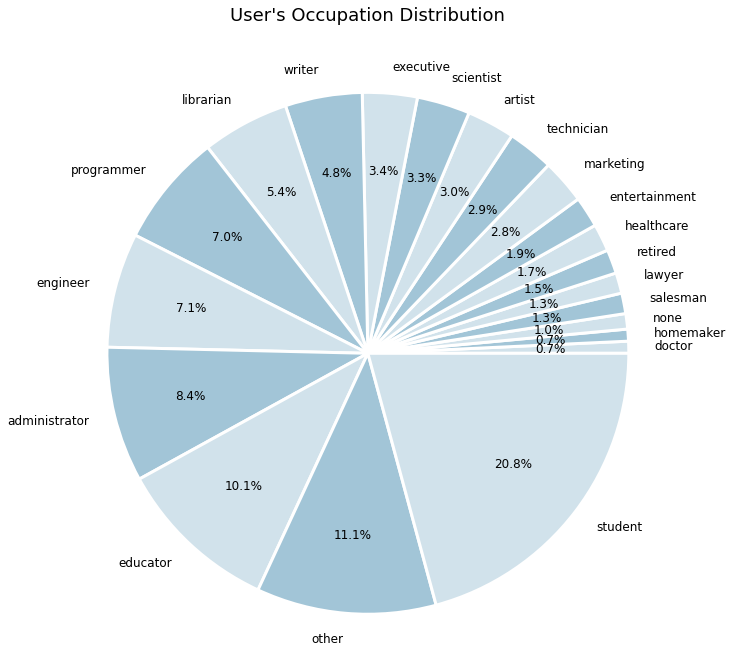

In [37]:
# occupation distrubution
color = ["#d1e2eb","#a2c5d7"]
occupation_count = users[["user_id", "occupation"]].groupby("occupation", as_index=False).size()  # count the numbers
occupation_count = occupation_count.sort_values(by = "size")
plt.pie(occupation_count["size"], 
        labels=occupation_count["occupation"],
        autopct='%.1f%%',
        radius = 3,
        pctdistance = 0.7,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},
        wedgeprops={'linewidth':3,'edgecolor':'w'},   # 繪製每個扇形的外框
        colors = color)
plt.title("User's Occupation Distribution", {"fontsize" : 18}, y=2)
#plt.axis("equal")
plt.show()

### 男女比例圓餅圖

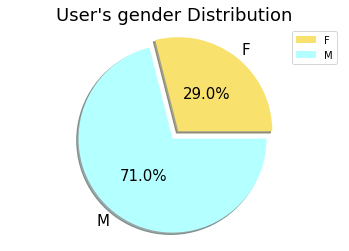

In [38]:
# occupation distrubution
color = ["#f8e16c","#b4ffff"]
occupation_count = users[["user_id", "gender"]].groupby("gender", as_index=False).size()  # count the numbers
plt.pie(occupation_count["size"],
        labels = occupation_count["gender"],
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        explode = (0,0.1),              # 設定分隔的區塊位置
        pctdistance = 0.5,              # 數字距圓心的距離
        textprops = {"fontsize" : 15},  # 文字大小
        shadow=True,                    # 設定陰影
        colors = color)                   
plt.title("User's gender Distribution", {"fontsize" : 18})
plt.legend(loc = "best")
plt.axis("equal")
plt.show()

### 年齡比例圓餅圖

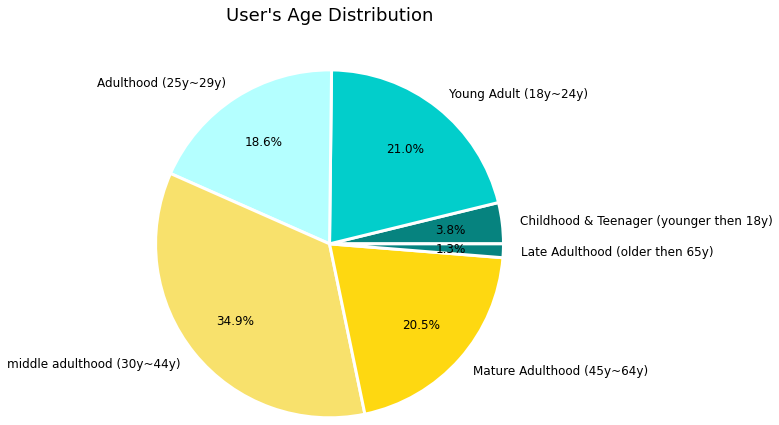

In [39]:
age_groups = ["Childhood & Teenager (younger then 18y)", "Young Adult (18y~24y)", "Adulthood (25y~29y)", "middle adulthood (30y~44y)", "Mature Adulthood (45y~64y)", "Late Adulthood (older then 65y)"]
age_count = [0, 0, 0, 0, 0, 0]
ages = users['age'].tolist()

for i in range(len(ages)):
    if ages[i] < 18:
        age_count[0] += 1
    elif ages[i] < 25:
        age_count[1] += 1
    elif ages[i] < 30:
        age_count[2] += 1       
    elif ages[i] < 45:
        age_count[3] += 1
    elif ages[i] < 65:
        age_count[4] += 1
    elif ages[i] >= 65:
        age_count[5] += 1
        
plt.pie(age_count, 
        labels=age_groups,
        autopct='%.1f%%',
        radius = 2,
        pctdistance = 0.7,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},
        wedgeprops={'linewidth':3,'edgecolor':'w'},    # 繪製扇形的外框
        colors = ['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])   

plt.title("User's Age Distribution", {"fontsize" : 18}, y=1.5)
#plt.axis("equal")
plt.show()

# Analyze the movie data 分析電影資料

### 電影各類型數量比例

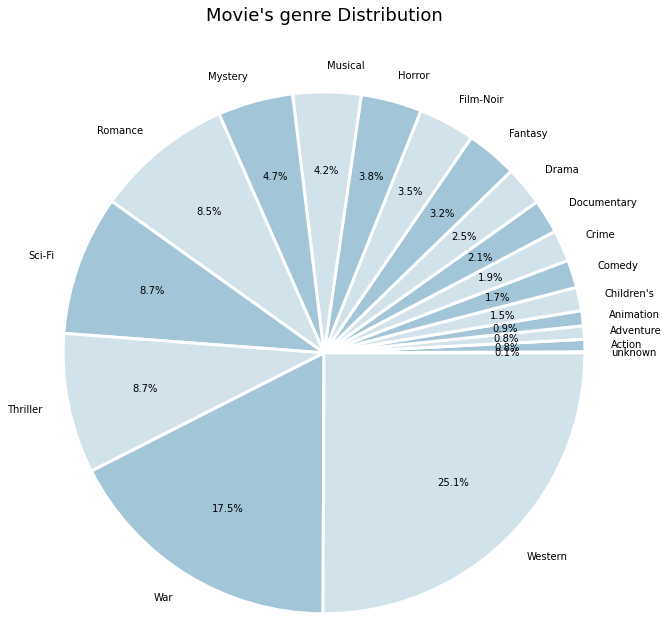

In [40]:
type_num = []
color = ["#d1e2eb","#a2c5d7"]

for i in range(19):
    type_num.append(0)
    
for i in range(len(movies)):
    for j in range(19):
        if movies.loc[i][j+4] == 1:
            type_num[j] += 1
type_num = sorted(type_num, key = lambda x:float(x))
plt.pie(type_num, 
        labels=genre1,
        autopct='%.1f%%',
        radius = 3,
        pctdistance = 0.7,
        textprops = {"fontsize" : 10},
        wedgeprops={'linewidth':3,'edgecolor':'w'},
        colors = color)

plt.title("Movie's genre Distribution", {"fontsize" : 18}, y=2)
#plt.axis("equal")
plt.show()

# Anslyze the data with users and movies 結合user&movie資料作分析

### 各種職業評分最高的電影類型

- **處理rating資料**

In [41]:
ratingA = rating.copy()
ratingA.head()

,user_id,item_id,rating,age,gender,occupation,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,49,1,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,23,1,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,42,1,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,60,1,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,31,1,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- **計算每個職業給每個電影類別評分的平均**

In [42]:
Occup_to_movie = pd.DataFrame(index=range(21), columns=genre1)

count = []
for i in range(21):
    count.append([])
    for j in range(19):
        count[i].append(0)
        Occup_to_movie.loc[i][j] = 0
        
for i in range(100000):
    for j in range(6,25):
        if ratingA.loc[i][j] != 0:
            Occup_to_movie.loc[ratingA.loc[i]['occupation']][j-6] += int(ratingA.loc[i][2])
            count[ratingA.loc[i]['occupation']][j-6] += 1
for i in range(21):
    for j in range(19):
        if Occup_to_movie.loc[i][j] !=0:
            Occup_to_movie.loc[i][j] /= count[i][j]
Occup_to_movie.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,3.538751,3.521569,3.738916,3.448052,3.49478,3.693805,3.875,3.796063,3.468085,3.972789,3.393862,3.596045,3.763636,3.741391,3.650743,3.604459,3.924936,3.702381
1,0,3.539773,3.581994,3.421488,3.391089,3.52188,3.676617,4.147059,3.789969,3.291667,4.234375,3.460784,3.414013,3.792683,3.729437,3.818182,3.590336,3.902222,3.862069
2,0,3.618182,3.561404,3.363636,3.5,3.559524,3.804878,3.461538,3.785714,3.0,4.111111,3.5,3.592593,3.962963,3.699248,3.5,3.769231,4.159091,3.8
3,3.0,3.581549,3.619681,3.593156,3.397976,3.564993,3.752113,3.775701,3.811259,3.508929,4.064356,3.171021,3.594595,3.789474,3.758724,3.622718,3.581777,3.908458,3.851852
4,3.0,3.488801,3.538876,3.614325,3.386328,3.433552,3.666121,3.666667,3.701554,3.2,3.924138,3.282609,3.517007,3.633609,3.644853,3.583948,3.489486,3.839161,3.6


In [43]:
#Occup_to_movie.to_csv("C:\\Users\\Sophia\\Desktop\\yo.csv")
Occup_to_movie = Occup_to_movie.T
#Occup_to_movie
Occuppp = Occup_to_movie
occup_like_movies = Occuppp.astype('float64').idxmax()

- **show 各種職業評分最高的電影類型**

In [44]:
dfA_header = ["occupation", "favorite movie"]
occupationn = pd.read_csv("C:\\Users\\Sophia\\Desktop\\RecommendSystem_final\\ml-100k\\ml-100k\\u.occupation", header = None)
occupationn['favorite genre of movie'] = occup_like_movies
occupationn.rename({0: 'occupation'}, axis=1, inplace=True)
occupationn

,occupation,favorite genre of movie
0,administrator,Film-Noir
1,artist,Film-Noir
2,doctor,War
3,educator,Film-Noir
4,engineer,Film-Noir
5,entertainment,unknown
6,executive,War
7,healthcare,Musical
8,homemaker,Mystery
9,lawyer,Film-Noir


### 男女評分最高的電影類別前三名

- **處理rating資料**

In [45]:
ratingB = rating.copy()
ratingB.head()

,user_id,item_id,rating,age,gender,occupation,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,49,1,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,23,1,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,42,1,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,60,1,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,31,1,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- **計算男女給每個電影類別評分的平均**

In [46]:
gender_to_movie = pd.DataFrame(index=range(2), columns=genre1)
countB = []

for i in range(2):
    countB.append([])
    for j in range(19):
        countB[i].append(0)
        gender_to_movie.loc[i][j] = 0

for i in range(100000):
    for j in range(6,25):
        if ratingB.loc[i][j] != 0:
            gender_to_movie.loc[ratingB.loc[i]['gender']][j-6] += int(ratingB.loc[i][2])
            countB[ratingB.loc[i]['gender']][j-6] += 1
            
for i in range(2):
    for j in range(19):
        if gender_to_movie.loc[i][j] !=0:
            gender_to_movie.loc[i][j] /= countB[i][j]
gender_to_movie.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3.5,3.484013,3.517988,3.627136,3.426971,3.424021,3.556299,3.614973,3.662246,3.201102,3.74026,3.263993,3.640083,3.560122,3.655685,3.497908,3.496068,3.781179,3.514825
1,3.125,3.479228,3.499246,3.557471,3.32,3.382972,3.654049,3.691769,3.696957,3.220425,3.973294,3.298058,3.472665,3.664208,3.607072,3.577072,3.512927,3.826328,3.637896


- **輸出男女性評分最高的電影類型前三名**

In [47]:
gender_to_movies = gender_to_movie

rank = []

gender_like_movies_idx = gender_to_movies.astype('float64').idxmax(axis = 1)
rank.append(gender_like_movies_idx.tolist())
for i in range(2):
    gender_to_movies.loc[0, rank[i][0]] = 0
    gender_to_movies.loc[1, rank[i][1]] = 0
    gender_like_movies_idx = gender_to_movies.astype('float64').idxmax(axis = 1)
    rank.append(gender_like_movies_idx.tolist())

print("女性評分最高的電影類型:\n1st", rank[0][0], "\n2nd", rank[1][0] ,"\n3rd", rank[2][0], "\n")
print("男性評分最高的電影類型:\n1st", rank[0][1], "\n2nd", rank[1][1] ,"\n3rd", rank[2][1])

女性評分最高的電影類型:
1st War 
2nd Film-Noir 
3rd Drama 

男性評分最高的電影類型:
1st Film-Noir 
2nd War 
3rd Drama


### 各年齡段評分最高的電影類別前三名

- **check the range of age
    (group: 兒童&青年 18以下, 青壯年 18-24, 成年 25-29, 壯年 30-44, 中年 45-64, 老年 older then 65)**

In [48]:
tempdfh = ["user_id", "age", "gender", "occupation", "timestamp"]
tempdf = pd.read_csv("C:\\Users\\Sophia\\Desktop\\RecommendSystem_final\\ml-100k\\ml-100k\\u.user", sep = '|', header = None, names=tempdfh)
#print(tempdf.sort_values(by = "age"))
#want to know the range of age -> 7-73
#group: 兒童&青年 18以下, 青壯年 18-24, 成年 25-29, 壯年 30-44, 中年 45-64, 老年 then 65

- **處理rating資料**

In [49]:
ratingC = rating.copy()
ratingC.head()

,user_id,item_id,rating,age,gender,occupation,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,49,1,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,23,1,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,42,1,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,60,1,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,31,1,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- **計算每個年齡段給每個電影類別評分的平均**

In [51]:
#group: 兒童&青年 18以下, 青壯年 18-24, 成年 25-29, 壯年 30-44, 中年 45-64, 老年 then 65
age_to_movie = pd.DataFrame(index=range(6), columns=genre1)
countC = []

for i in range(6):
    countC.append([])
    for j in range(19):
        countC[i].append(0)
        age_to_movie.loc[i][j] = 0

for i in range(100000):
    for j in range(6,25):
        if ratingC.loc[i][j] != 0:
            if ratingC.loc[i]['age'] < 18:
                age_to_movie.loc[0][j-6] += int(ratingC.loc[i][2])
                countC[0][j-6] += 1
            elif ratingC.loc[i]['age'] <= 24 and ratingC.loc[i]['age'] >= 18:
                age_to_movie.loc[1][j-6] += int(ratingC.loc[i][2])
                countC[1][j-6] += 1
            elif ratingC.loc[i]['age'] <=29 and ratingC.loc[i]['age'] >= 25:
                age_to_movie.loc[2][j-6] += int(ratingC.loc[i][2])
                countC[2][j-6] += 1
            elif ratingC.loc[i]['age'] <=44 and ratingC.loc[i]['age'] >= 30:
                age_to_movie.loc[3][j-6] += int(ratingC.loc[i][2])
                countC[3][j-6] += 1
            elif ratingC.loc[i]['age'] <= 64 and ratingC.loc[i]['age'] >= 45:
                age_to_movie.loc[4][j-6] += int(ratingC.loc[i][2])
                countC[4][j-6] += 1
            elif ratingC.loc[i]['age'] >= 65:
                age_to_movie.loc[5][j-6] += int(ratingC.loc[i][2])
                countC[5][j-6] += 1
for i in range(6):
    for j in range(19):
        if age_to_movie.loc[i][j] !=0:
            age_to_movie.loc[i][j] /= countC[i][j]
age_to_movie.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,3.567531,3.547368,3.469027,3.093633,3.156888,3.531401,3.0,3.594465,2.923077,3.5,3.705128,3.144,3.536232,3.624719,3.775076,3.545307,3.858586,3.653846
1,3.75,3.444137,3.456308,3.589689,3.310345,3.339628,3.641624,3.666667,3.640718,3.078261,3.786624,3.329468,3.517874,3.502103,3.608243,3.537216,3.470295,3.788755,3.434483
2,2.666667,3.419383,3.457347,3.546841,3.361923,3.37572,3.602138,3.707483,3.63116,3.158416,3.85034,3.256595,3.530466,3.521784,3.576511,3.507518,3.433868,3.724814,3.551532
3,3.0,3.501972,3.524518,3.57767,3.386631,3.411157,3.615629,3.747934,3.712425,3.227468,3.953344,3.250143,3.526168,3.700924,3.626282,3.571625,3.527061,3.826507,3.621622
4,0,3.572074,3.597292,3.639098,3.402139,3.503035,3.696404,3.610526,3.756577,3.549738,4.047836,3.282577,3.549572,3.783898,3.674219,3.628363,3.622942,3.912428,3.866295


- **輸出各年齡段評分最高的電影類型前三名**

In [52]:
rank_age = []

age_like_movies_idx = age_to_movie.astype('float64').idxmax(axis = 1)
rank_age.append(age_like_movies_idx.tolist())
for i in range(2):
    age_to_movie.loc[0, rank_age[i][0]] = 0
    age_to_movie.loc[1, rank_age[i][1]] = 0
    age_to_movie.loc[2, rank_age[i][2]] = 0
    age_to_movie.loc[3, rank_age[i][3]] = 0
    age_to_movie.loc[4, rank_age[i][4]] = 0
    age_to_movie.loc[5, rank_age[i][5]] = 0
    age_like_movies_idx = age_to_movie.astype('float64').idxmax(axis = 1)
    rank_age.append(age_like_movies_idx.tolist())

print("兒童&青年-18歲以下最愛電影類型:\n1st", rank_age[0][0], "\n2nd", rank_age[1][0] ,"\n3rd", rank_age[2][0], "\n")
print("青壯年-18~24歲最愛電影類型:\n1st", rank_age[0][1], "\n2nd", rank_age[1][1] ,"\n3rd", rank_age[2][1], "\n")
print("成年-25~29歲最愛電影類型:\n1st", rank_age[0][2], "\n2nd", rank_age[1][2] ,"\n3rd", rank_age[2][2], "\n")
print("壯年-30~44歲最愛電影類型:\n1st", rank_age[0][3], "\n2nd", rank_age[1][3] ,"\n3rd", rank_age[2][3], "\n")
print("中年-45~64歲最愛電影類型:\n1st", rank_age[0][4], "\n2nd", rank_age[1][4] ,"\n3rd", rank_age[2][4], "\n")
print("老年-65歲以上最愛電影類型:\n1st", rank_age[0][5], "\n2nd", rank_age[1][5] ,"\n3rd", rank_age[2][5], "\n")

兒童&青年-18歲以下最愛電影類型:
1st War 
2nd Sci-Fi 
3rd Horror 

青壯年-18~24歲最愛電影類型:
1st War 
2nd Film-Noir 
3rd unknown 

成年-25~29歲最愛電影類型:
1st Film-Noir 
2nd War 
3rd Documentary 

壯年-30~44歲最愛電影類型:
1st Film-Noir 
2nd War 
3rd Documentary 

中年-45~64歲最愛電影類型:
1st Film-Noir 
2nd War 
3rd Western 

老年-65歲以上最愛電影類型:
1st Film-Noir 
2nd Fantasy 
3rd Western 



# Recommendation

### user based

- **計算每個user之間的相似度**

In [70]:
import numpy as np
import pandas as pd
data_header = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_csv("C:\\Users\\Sophia\\Desktop\\RecommendSystem_final\\ml-100k\\ml-100k\\u.data", sep = '\t', header = None, names=data_header)

ratings.drop(columns=["timestamp"], inplace=True) #去除zipcode
ratings_matrix = ratings.pivot_table(index=["user_id"], columns=["movie_id"], values="rating")
user_similar = ratings_matrix.T.corr()
user_similar.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.160841,0.11278,0.500000,0.420809,0.287159,0.258137,0.692086,-0.102062,-0.092344,...,0.061695,-0.260242,0.383733,2.899974e-02,0.326744,5.343904e-01,0.263289,0.205616,-0.180784,0.067549
2,0.160841,1.000000,0.06742,0.148522,0.327327,0.446269,0.643675,0.585491,0.242536,0.668145,...,0.021007,-0.271163,0.214017,5.616449e-01,0.331587,-7.671236e-18,-0.011682,-0.062017,0.085960,0.479702
3,0.112780,0.067420,1.00000,-0.262600,NaN,-0.109109,0.064803,0.291937,NaN,0.311086,...,NaN,NaN,-0.045162,-5.233642e-17,-0.137523,NaN,-0.104678,1.000000,-0.011792,NaN
4,0.500000,0.148522,-0.26260,1.000000,1.000000,-0.581318,-0.266632,0.642938,NaN,-0.301511,...,0.500000,NaN,-0.203653,NaN,0.375000,NaN,0.850992,1.000000,0.412568,NaN
5,0.420809,0.327327,NaN,1.000000,1.000000,0.241817,0.175630,0.537400,0.577350,0.087343,...,0.229532,-0.500000,0.439286,6.085806e-01,0.484211,8.807048e-01,0.027038,0.468521,0.318163,0.346234


- **取得電影編號以及名稱**

In [71]:
moviee_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movie_name = pd.read_csv("C:\\Users\\Sophia\\Desktop\\RecommendSystem_final\\ml-100k\\ml-100k\\u.item", sep = '|', header = None, encoding = 'latin1', names = moviee_header)

# remove the video release date (no values)
movie_name = movie_name.drop(columns=["video_release_date", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"])
movie_name = movie_name.values.tolist()

- **預測電影評分(單一user對單一movie評分) $$評分公式 : pred(u, i) = r_{u,i} = {∑_{v∈U} sim(u, v) ∗ r_{vi} \over ∑_{v∈U}|sim(u,v)|} $$**

In [72]:
def predict(uid, iid, ratings_matrix, user_similar):
    similar_users = user_similar[uid].drop([uid]).dropna() # 找出跟uid這個user相似的user
    similar_users = similar_users.where(similar_users>0).dropna() # 正相關

    # 從uid的similar user中選出對ild(movie)有評分的similar user
    ids = set(ratings_matrix[iid].dropna().index)&set(similar_users.index)
    finally_similar_users = similar_users.loc[list(ids)]

    # 使用公式預測
    numer = 0 
    denomin = 0 
    for sim_uid, similarity in finally_similar_users.iteritems():
        sim_user_rated_movies = ratings_matrix.loc[sim_uid].dropna() # similiar user
        sim_user_rating_for_item = sim_user_rated_movies[iid] # rating of similiar user
        numer += similarity * sim_user_rating_for_item # 公式分子
        denomin += similarity # 公式分母

    predict_rating = numer/denomin
    return round(predict_rating, 2)

- **單一user對全部movie的預測**

In [73]:
def predict_all(uid, ratings_matrix, user_similar):
    # 要預測的movie
    item_ids = ratings_matrix.columns
    
    # 一個一個預測
    for iid in item_ids:
        try:
            rating = predict(uid, iid, ratings_matrix, user_similar)
        except Exception as e: 
            pass
        else:
            yield uid, iid, rating

for i in predict_all(1, ratings_matrix, user_similar):
    pass

- **輸入想要預測的user id, 推薦20部電影**

In [66]:
u = input("請輸入想要預測的user id (1~943): ")
print("waiting...\n")
def top_k_rs_result(k):
    results = predict_all(int(u), ratings_matrix, user_similar)
    return sorted(results, key=lambda x: x[2], reverse=True)[:k]
result = top_k_rs_result(20)
print(f"根據user based推薦給user{u}的20部電影")
for i in range(20):
    if i < 9:
        print(i+1, "  ", movie_name[int(result[i][1])][1])
    else:
        print(i+1, " ", movie_name[int(result[i][1])][1])

請輸入想要預測的user id (1~943): 29
waiting...

根據user based推薦給user29的20部電影
1    One Fine Day (1996)
2    Last Time I Saw Paris, The (1954)
3    That Old Feeling (1997)
4    Boys of St. Vincent, The (1993)
5    Maybe, Maybe Not (Bewegte Mann, Der) (1994)
6    Ayn Rand: A Sense of Life (1997)
7    The Deadly Cure (1996)
8    Forbidden Christ, The (Cristo proibito, Il) (1950)
9    Innocent Sleep, The (1995)
10   Cure, The (1995)
11   Tokyo Fist (1995)
12   Getaway, The (1994)
13   Golden Earrings (1947)
14   Striptease (1996)
15   Angel Baby (1995)
16   Mina Tannenbaum (1994)
17   Shopping (1994)
18   Mighty Aphrodite (1995)
19   Cinema Paradiso (1988)
20   Koyaanisqatsi (1983)


### item based

- **計算每個item之間的相似度**

In [74]:
datai_header = ["user_id", "movie_id", "rating", "timestamp"]
ratings_item = pd.read_csv("C:\\Users\\Sophia\\Desktop\\RecommendSystem_final\\ml-100k\\ml-100k\\u.data", sep = '\t', header = None, names=data_header)

ratings_item.drop(columns=["timestamp"], inplace=True) #去除zipcode
ratings_item_matrix = ratings_item.pivot_table(index=["user_id"], columns=["movie_id"],values="rating")

item_similar = ratings_matrix.corr()
item_similar.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
movie_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.221784,0.175794,0.103135,0.386475,0.529401,0.159248,0.247367,0.090176,0.187502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.221784,1.000000,0.230536,0.244556,0.217559,-0.158114,0.175445,0.340525,-0.227599,0.199083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.175794,0.230536,1.000000,-0.201969,0.184612,0.806226,0.071509,-0.118587,0.016742,0.071563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.103135,0.244556,-0.201969,1.000000,-0.237350,0.066625,0.152733,0.281270,0.208459,0.231931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.386475,0.217559,0.184612,-0.237350,1.000000,1.000000,0.180211,0.205114,0.065169,-0.843661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- **單一user對全部movie的預測**

In [77]:
def predict_all_by_itemBased(uid, ratings_matrix, user_similar):
    # 要預測的movie
    item_ids = ratings_matrix.columns
    
    # 一個一個預測
    for iid in item_ids:
        try:
            rating = predict(uid, iid, ratings_matrix, item_similar)
        except Exception as e: 
            pass
        else:
            yield uid, iid, rating

for i in predict_all_by_itemBased(1, ratings_matrix, item_similar):
    pass

- **輸入想要預測的user id, 推薦20部電影**

In [78]:
u = input("請輸入想要預測的user id (1~943): ")
print("waiting...\n")
def top_k_rs_result(k):
    results = predict_all_by_itemBased(int(u), ratings_matrix, item_similar)
    return sorted(results, key=lambda x: x[2], reverse=True)[:k]
result = top_k_rs_result(20)
print(f"根據item based推薦給user{u}的20部電影")
for i in range(20):
    if i < 9:
        print(i+1, "  ", movie_name[int(result[i][1])][1])
    else:
        print(i+1, " ", movie_name[int(result[i][1])][1])

請輸入想要預測的user id (1~943): 29
waiting...

根據item based推薦給user29的20部電影
1    Striptease (1996)
2    One Fine Day (1996)
3    That Old Feeling (1997)
4    Boys of St. Vincent, The (1993)
5    Maybe, Maybe Not (Bewegte Mann, Der) (1994)
6    Metro (1997)
7    Foreign Correspondent (1940)
8    Cure, The (1995)
9    Prisoner of the Mountains (Kavkazsky Plennik) (1996)
10   Cosi (1996)
11   Amos & Andrew (1993)
12   Golden Earrings (1947)
13   Buddy (1997)
14   Blue Chips (1994)
15   Spanking the Monkey (1994)
16   Foxfire (1996)
17   Two or Three Things I Know About Her (1966)
18   Heidi Fleiss: Hollywood Madam (1995) 
19   It Happened One Night (1934)
20   Rendezvous in Paris (Rendez-vous de Paris, Les) (1995)
